In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# D. VISUALISASI DATA (MATPLOTLIB)
# 1. Load Data (Persiapan)
filename = 'dinkes-od_17448_jml_penderita_diabetes_melitus_brdsrkn_kabupatenko_v2_data.csv'
df = pd.read_csv(filename)

In [12]:
# --- Re-create Kolom Kategori (Butuh buat Soal No. 23) ---
def tentukan_kategori(jumlah):
    if jumlah >= 100000:
        return 'Tinggi'
    elif jumlah >= 50000:
        return 'Sedang'
    else:
        return 'Rendah'
df['kategori_dm'] = df['jumlah_penderita_dm'].apply(tentukan_kategori)
# ---------------------------------------------------------

In [13]:
# Set Style biar grafik agak cakep 
plt.style.use('ggplot') 

Membuat Grafik 20...


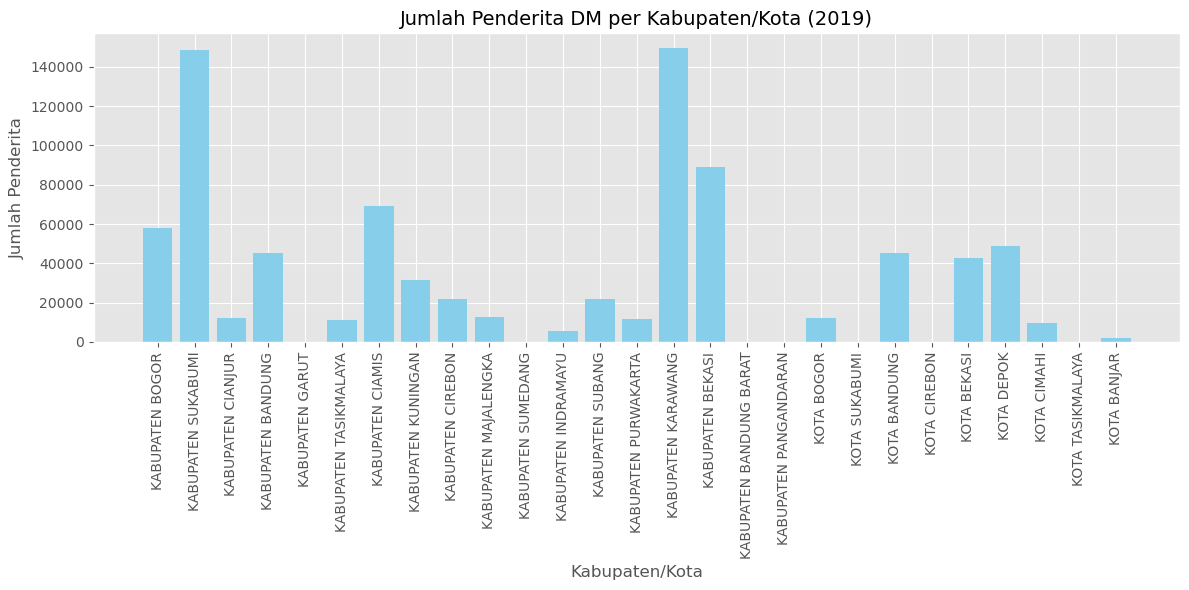

In [14]:
# 20. Grafik Bar: Penderita per Kabupaten/Kota Tahun 2019
print("Membuat Grafik 20...")
data_2019 = df[df['tahun'] == 2019]

plt.figure(figsize=(12, 6))
plt.bar(data_2019['nama_kabupaten_kota'], data_2019['jumlah_penderita_dm'], color='skyblue')
plt.title('Jumlah Penderita DM per Kabupaten/Kota (2019)', fontsize=14)
plt.xlabel('Kabupaten/Kota', fontsize=12)
plt.ylabel('Jumlah Penderita', fontsize=12)
plt.xticks(rotation=90) # Putar label nama kota biar gak tabrakan
plt.tight_layout()
plt.show()


Membuat Grafik 21...


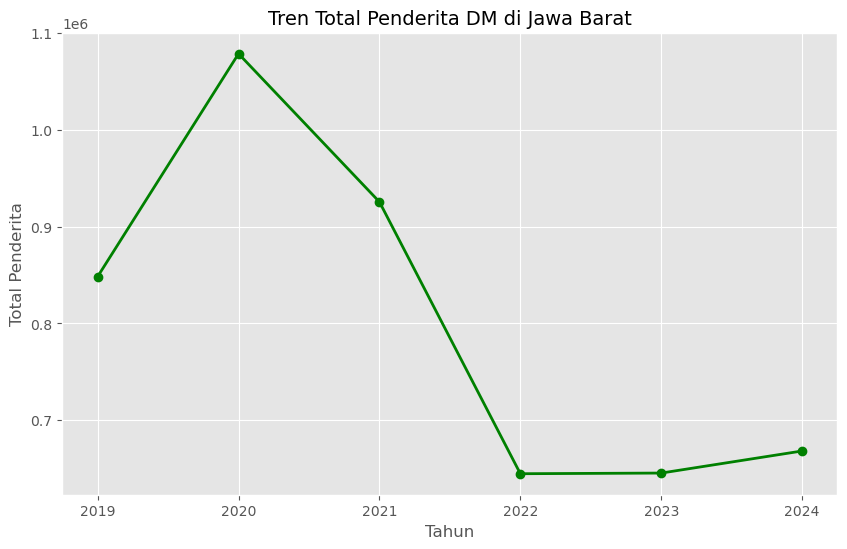

In [15]:
# 21. Grafik Garis: Tren Total Penderita per Tahun
print("Membuat Grafik 21...")
total_per_tahun = df.groupby('tahun')['jumlah_penderita_dm'].sum()

plt.figure(figsize=(10, 6))
plt.plot(total_per_tahun.index, total_per_tahun.values, marker='o', linestyle='-', color='green', linewidth=2)
plt.title('Tren Total Penderita DM di Jawa Barat', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Penderita', fontsize=12)
plt.grid(True)
plt.xticks(total_per_tahun.index) # Pastikan semua tahun muncul
plt.show()


Membuat Grafik 22...


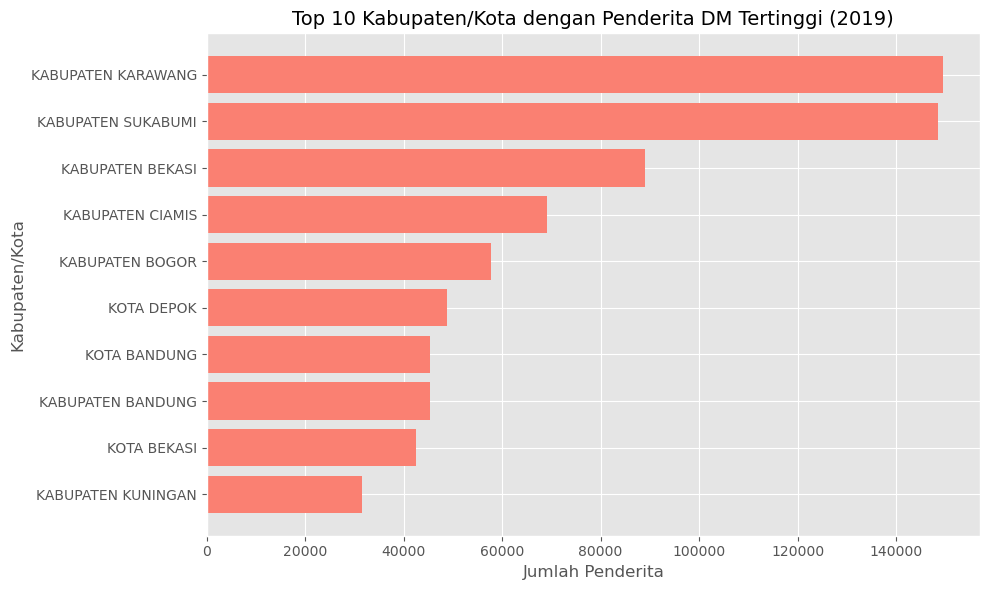

In [16]:
# 22. Grafik Bar Horizontal: Top 10 Tertinggi Tahun 2019
print("Membuat Grafik 22...")
top_10 = data_2019.sort_values('jumlah_penderita_dm', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10['nama_kabupaten_kota'], top_10['jumlah_penderita_dm'], color='salmon')
plt.title('Top 10 Kabupaten/Kota dengan Penderita DM Tertinggi (2019)', fontsize=14)
plt.xlabel('Jumlah Penderita', fontsize=12)
plt.ylabel('Kabupaten/Kota', fontsize=12)
plt.gca().invert_yaxis() # Balik sumbu Y biar ranking 1 ada di atas
plt.tight_layout()
plt.show()


Membuat Grafik 23...


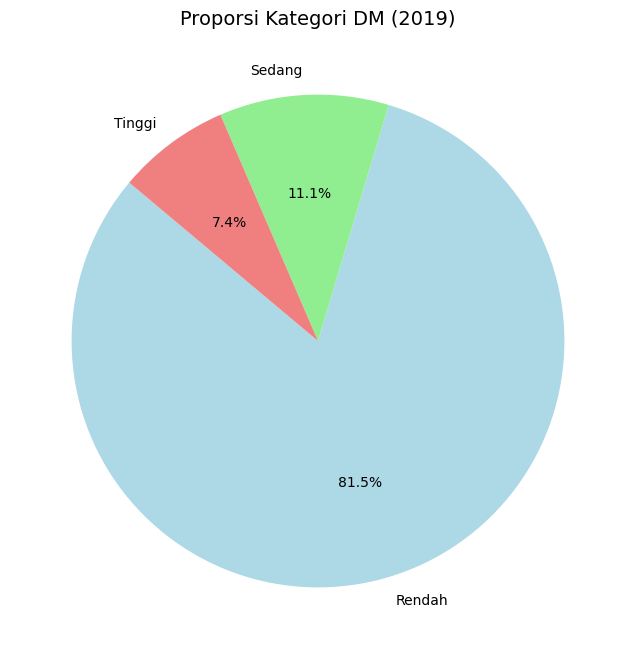

In [17]:
# 23. Pie Chart: Proporsi Kategori DM (2019)
print("Membuat Grafik 23...")
proporsi_kategori = data_2019['kategori_dm'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(proporsi_kategori, labels=proporsi_kategori.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proporsi Kategori DM (2019)', fontsize=14)
plt.show()


Membuat Grafik 24...


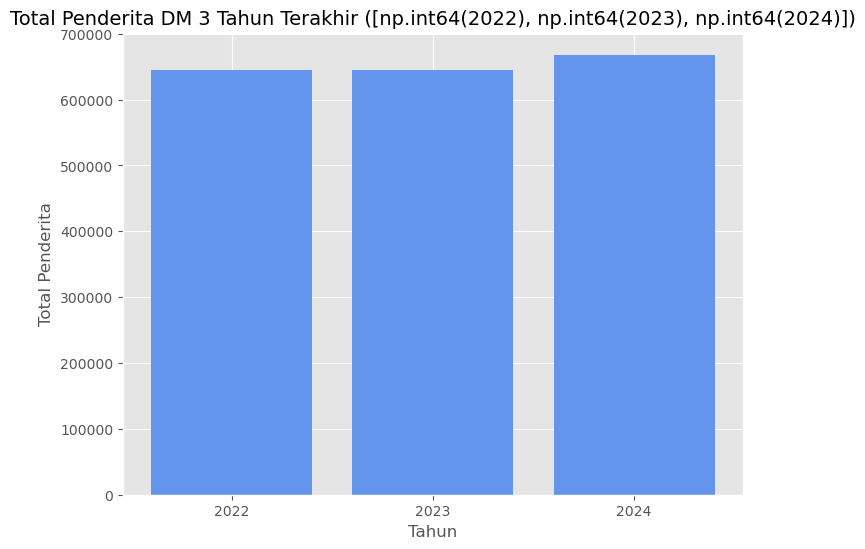

In [18]:
# 24. Grafik Bar: Perbandingan 3 Tahun Terakhir
print("Membuat Grafik 24...")
# Ambil 3 tahun terakhir yang tersedia di data
tahun_tersedia = sorted(df['tahun'].unique())
tiga_tahun_terakhir = tahun_tersedia[-3:] 

# Filter data cuma buat 3 tahun itu
data_3_thn = df[df['tahun'].isin(tiga_tahun_terakhir)]
total_3_thn = data_3_thn.groupby('tahun')['jumlah_penderita_dm'].sum()

plt.figure(figsize=(8, 6))
plt.bar(total_3_thn.index.astype(str), total_3_thn.values, color='cornflowerblue') # astype(str) biar sumbu X gak dianggap angka pecahan
plt.title(f'Total Penderita DM 3 Tahun Terakhir ({tiga_tahun_terakhir})', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Penderita', fontsize=12)
plt.show()